In [1]:
#Import dependancied
from Signalgenerator import SignalGenerator
from GL_method import GL_calculator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use case signal generator

Signal Gnerator will take dictionary as argument with keywords determining paramets of signal to generate. 

In [120]:
Data_generator = {'time_range': 300, 'no_data_points': 6000, 'sparcity': 0, 
                  'frequency': 0.3, 'Phase': 1.2, 'Amplitude': 2,
                  'DC': 10, 'Noise': 2, 'Random_seed': 29, 'asymetry' : 0}

In [121]:
#Instantiating the class of function generator with given parameters
ssg = SignalGenerator(Data_generator)

Generating sine signal

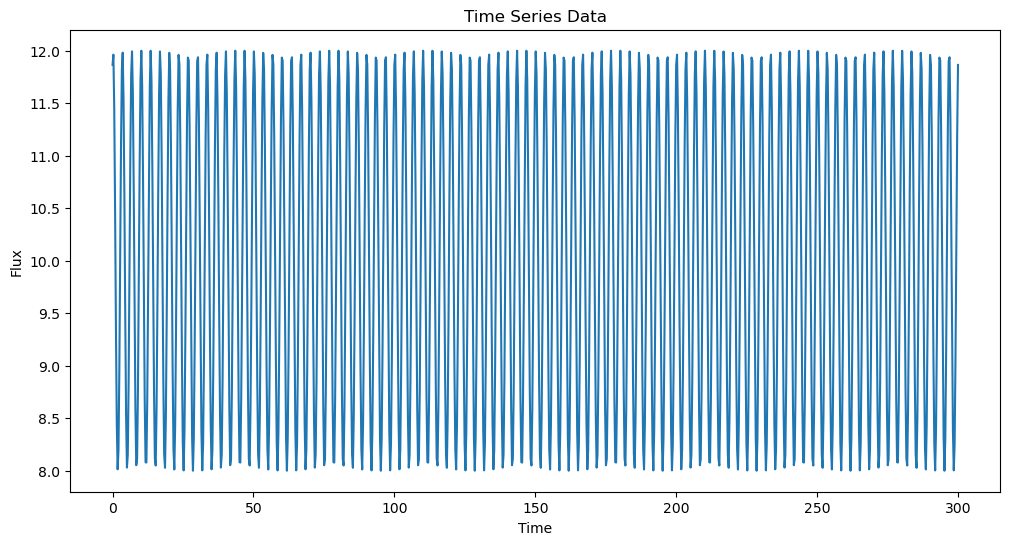

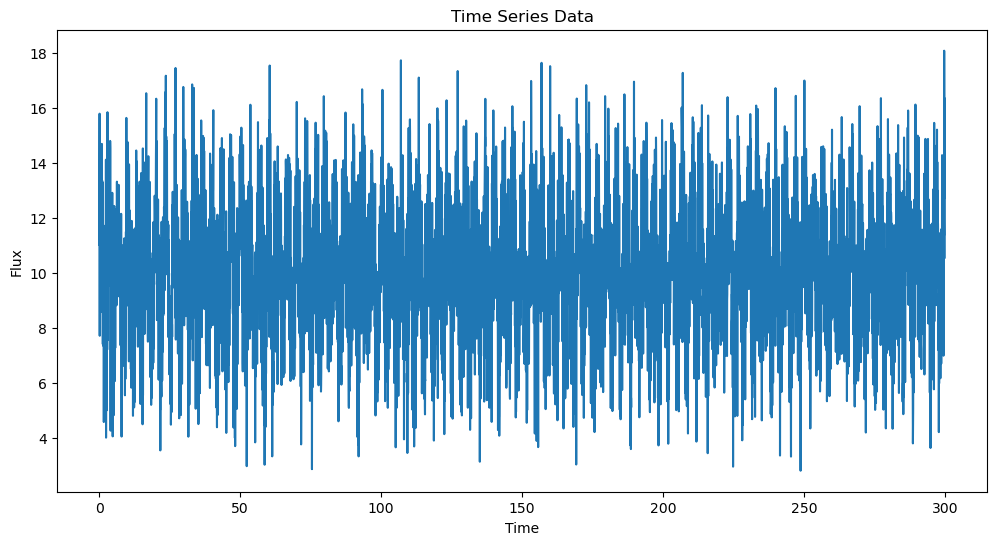

In [122]:
#Ploting sine signal with given parameters

data = ssg.generate_sine_signal() #other types of signal can also be generated here
#pure sine signal without sparcity and noise
ssg.plot_pure_data()

#sine signal to be used for analysis
ssg.plot_noise_data()

In [97]:
#Generated data set is numpy array of 3 column

print(type(data))
data.shape

<class 'numpy.ndarray'>


(200, 3)

First column is time stamp, Second is flux and Third is expected Noise

# Gregory-Lorendo Method

GLMethod Class with take two arguments, Data and Priors. Data is numpy arrray with three column and Priors in Dictionary with Six priors

In [98]:
Priors = {'bins': 7, 'rmin': 2, 'rmax': 18, 'w_min': 0.8, 'w_max': 2, 'w_resolution': 25}
#Bins is resolution of GL function
#rmin and rmax are range of flux to scan
#w_min and w_max are range of frequencty to scan
#w_resolution is resolution of frequecy in probability density function

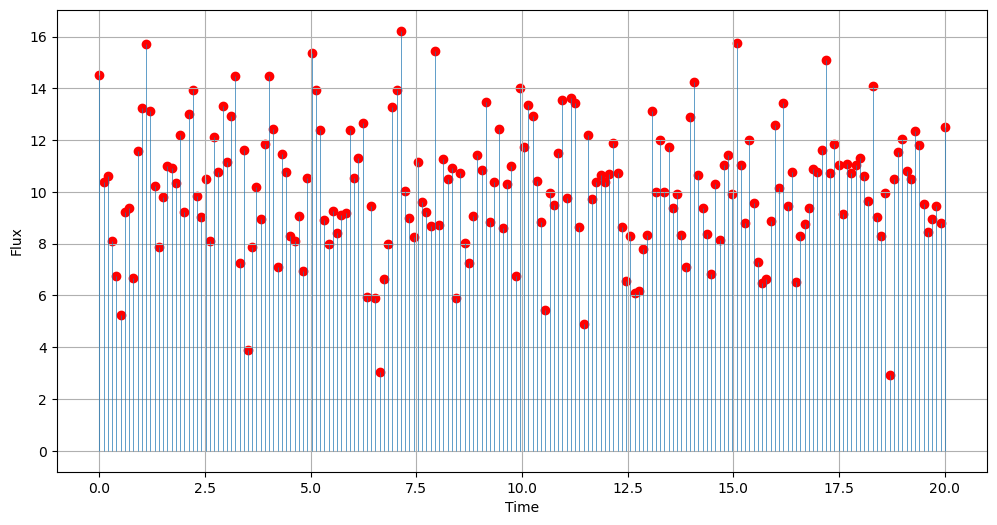

In [99]:
#Instantiating the class
pc = GL_calculator(data, Priors)

#Aplying class method to see the data set 
pc.plot_data()

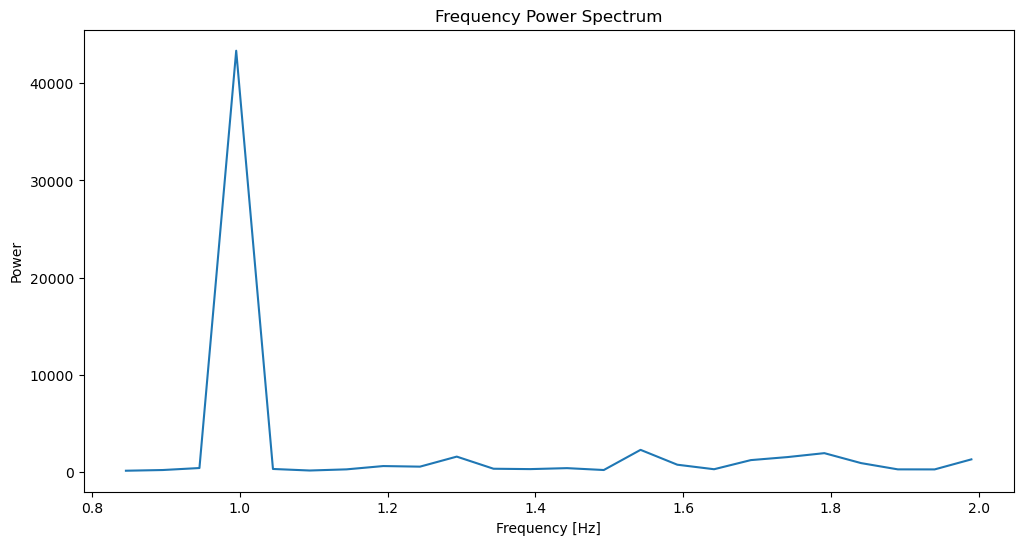

In [100]:
pc.plot_FFT()

*Add DC Noise If data point are close to zero other wise calculation might give numerical error

GL method using folling function to find the best fit parameters using the bayes theorm

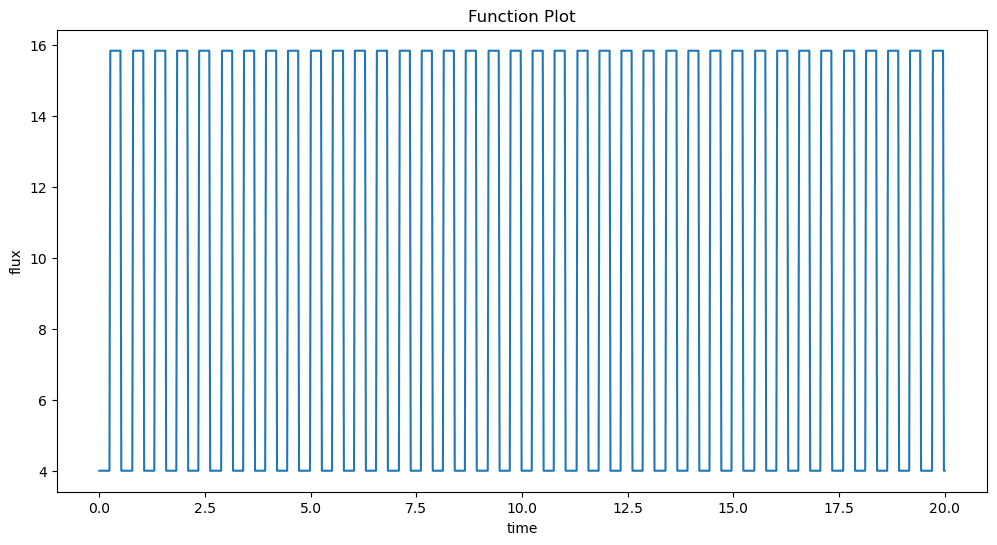

In [103]:
#This GL method is to sampling the function
pc.sample()

*Its important to check diffrent samples and verify that function plot and samples are in the same range, else change the priors of the method

First Import Function of GL method is <br>
p(w|D,M) <br>
probability of frequency given data and model<br>
*This is integral and might take some time

In [104]:
#Class method to calculate Integral(Likelihoof of frequency in all GL Models)
pc.Pw_dm()

Plot probability density of any specified number of bins. <b>
Make sure you have included it in calculation before this stem

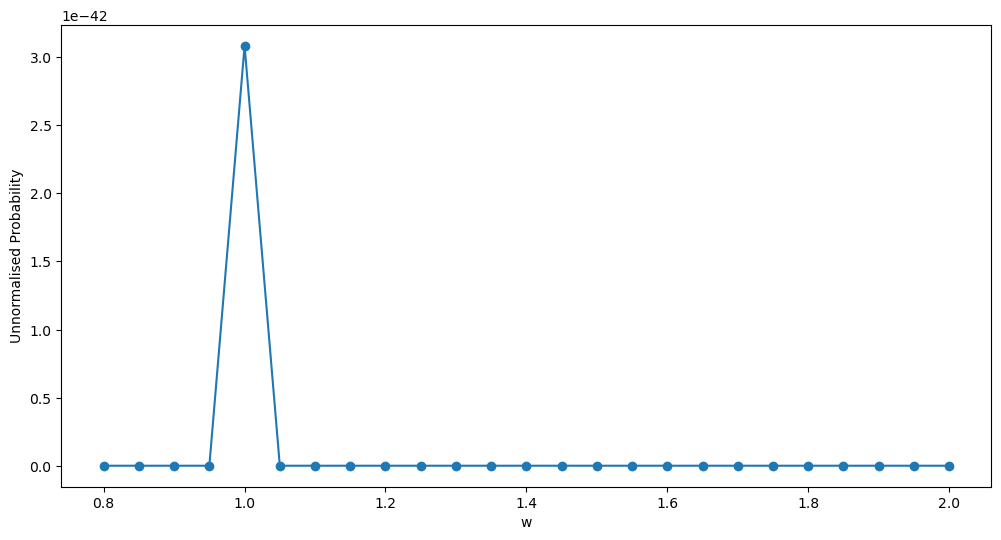

In [106]:
#before this plot Pw_dm method should be exicuted.
pc.plot_Pw_m(5)

Second Import Function of GL method is <br>
p(D|M) <br>
probability of data given model<br>
*This is double integral and might take some time

In [107]:
#following class method calculate double integral (Liklihoof of all GL models)
pc.Pd_m()

c:\Users\balay\Desktop\GL_method\Gregory-lorendo-Method\GL_functions.py:81: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((self.data[j_indices, 1] ** 2) / (self.data[j_indices, 2] ** 2)) / self.wj(j_indices, w, phi)
c:\Users\balay\Desktop\GL_method\Gregory-lorendo-Method\GL_functions.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(self.data[j_indices, 1] / (self.data[j_indices, 2] ** 2)) / self.wj(j_indices, w, phi)
c:\Users\balay\Desktop\GL_method\Gregory-lorendo-Method\GL_functions.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  (self.wj(j_values == p, w, phi)**(-1/2))*
c:\Users\balay\Anaconda3\envs\daml\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local dif

KeyboardInterrupt: 

Folling is plot of probability of data given number of bins <br>
Ideally you must keep increasing m in priors untill you get gausin bell in graph

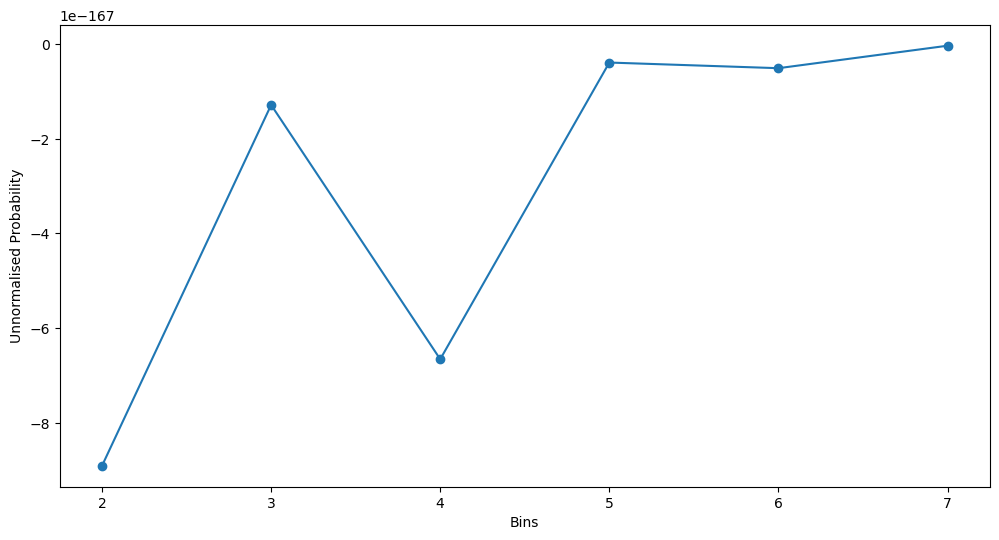

In [47]:
pc.plot_Pd_m()

In [49]:
pc.prob_m

[-8.911375504306626e-167,
 -1.285874164043074e-167,
 -6.660297951221408e-167,
 -3.902432338476322e-168,
 -5.094585674269573e-168,
 -3.4583467854531516e-169]

Now with doble integral you can plot probability destity of frequency averaged over all the bins

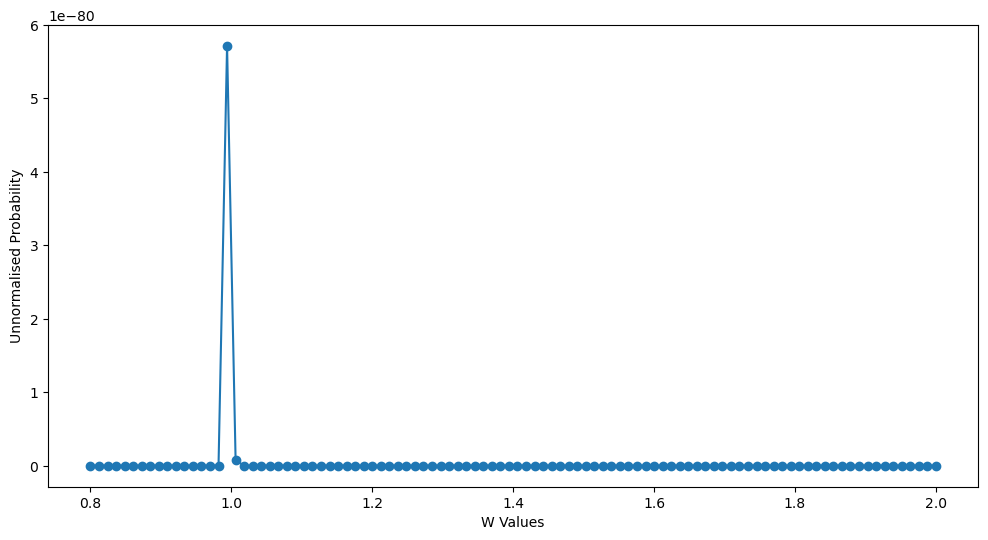

In [48]:
#Ploting the probability density of frequency averaged over all the bins
pc.plot_Pw()

Following command will save data to sql Database, Conform the scema fo database before using it

In [ ]:
#SaveGLToDB(pc) 

# With Gregory data

In [2]:
#Data of Gregory study from 1999 paper
time = [43382.94, 43570.00, 43729.99, 44100.97, 44479.93, 44840.03, 45907.00, 46990.63, 
        47013.02, 47416.00, 47544.20, 48738.80, 49395.88, 49421.77, 49446.61, 49472.19, 
        49500.09, 49530.19, 49555.05, 49580.98, 49607.76, 49634.92, 49659.69, 49689.71, 
        49744.37, 49794.32, 49823.41, 49850.01, 49875.25, 49902.04, 49926.86, 49954.94, 
        49980.74, 50006.58, 50034.83, 50060.72, 50088.72, 50114.35, 50431.66, 50458.60, 
        50486.47, 50516.55, 50547.31, 50568.25, 50594.12, 50627.13, 50650.07, 50675.00, 
        50707.88, 50722.83, 50752.82, 50781.63, 50810.71, 50834.64, 50856.58, 50877.55, 50903.40]

flux = [284.0, 138.0, 180.0, 100.0, 66.0, 309.0, 84.0, 184.0, 164.0, 64.0, 112.0, 198.0, 138.0, 
        200.0, 116.0, 227.0, 214.0, 167.0, 262.0, 170.0, 186.0, 294.0, 265.0, 296.0, 166.0, 
        283.0, 245.0, 169.0, 232.0, 300.0, 306.0, 244.0, 320.0, 236.0, 254.0, 242.0, 269.0, 
        229.0, 216.0, 62.0, 117.0, 193.0, 147.0, 119.0, 132.0, 101.0, 164.0, 188.0, 94.0, 
        186.0, 93.0, 100.0, 124.0, 92.0, 61.0, 135.0, 120.0]

Convert the data into numpy array of required shape

In [3]:
# Create a pandas DataFrame
df = pd.DataFrame({'time': time, 'flux': flux, 'error': 33 })#Using error of 33

#Stacking column to get desired shape
data = np.column_stack((df['time'], df['flux'], df['error']))

In [4]:
#Talking apropirate priors
Priors = {'bins': 7, 'rmin': 50, 'rmax': 350, 'w_min': 0.0036, 'w_max': 0.0040, 'w_resolution': 50}

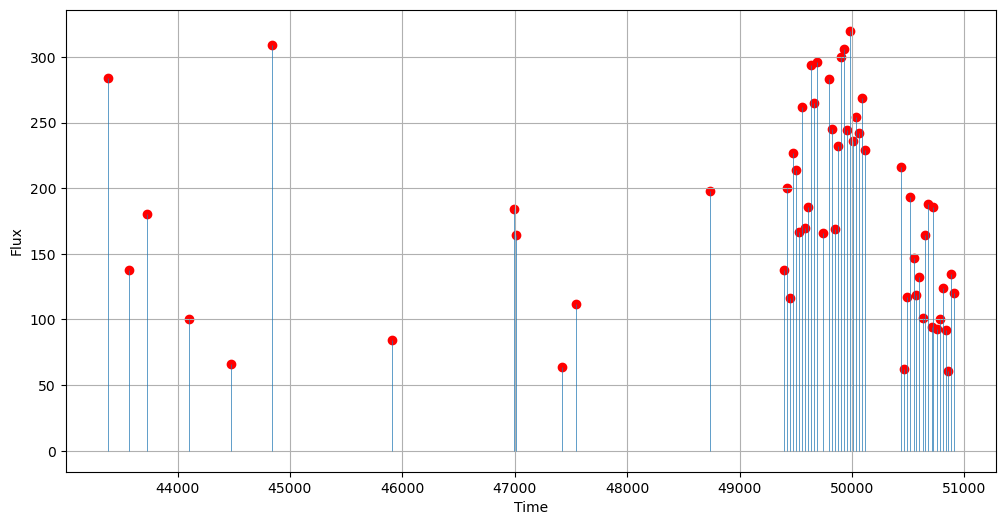

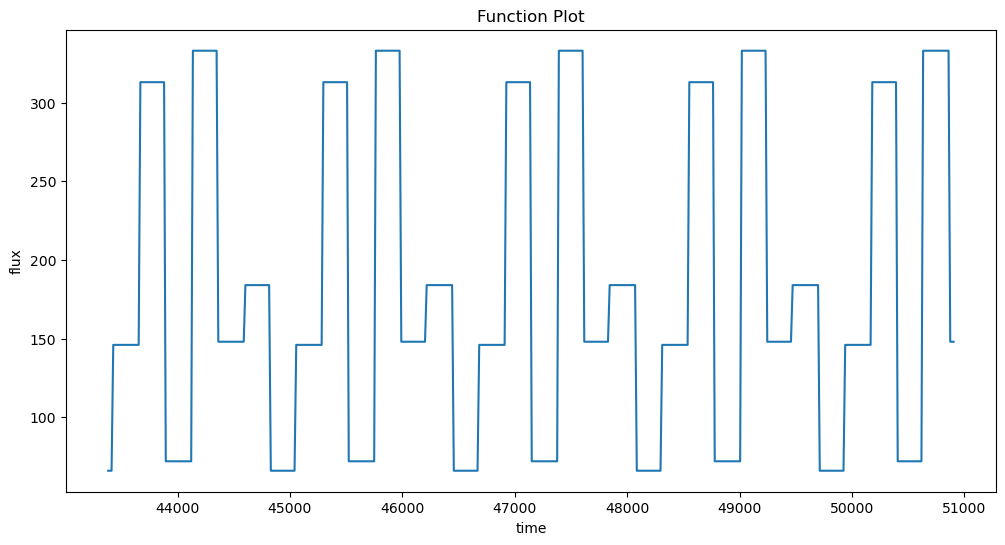

In [5]:
#Instantiate class
pc2 = GL_calculator(data, Priors)
#plot data
pc2.plot_data()
#Plot priors
GL_sample(pc2)

In [6]:
#Perform Single Integral
pc2.Pw_dm()
#Perform Double Integral
pc2.Pd_m()

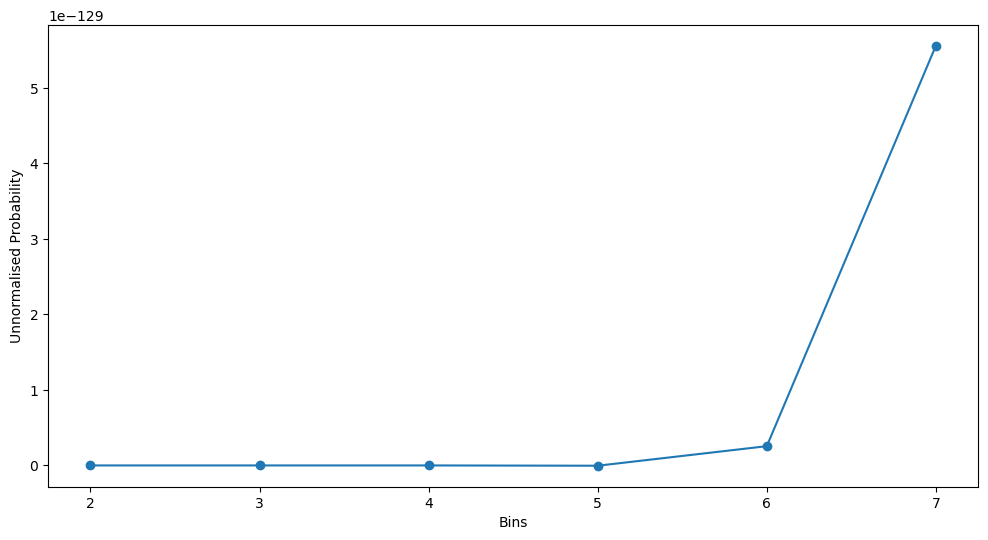

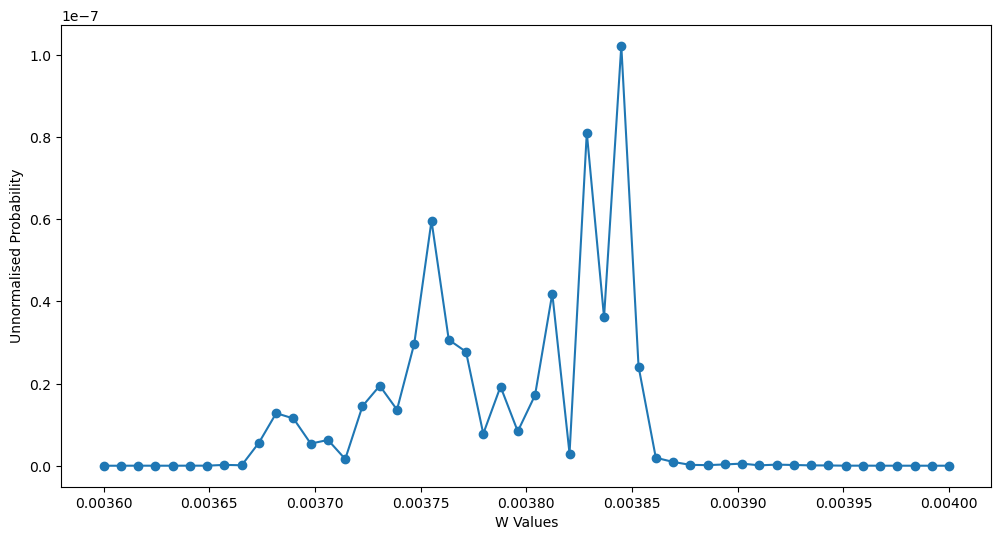

In [ ]:
#Plot of given plots from paper
pc2.plot_Pd_m() #probability of bins
pc2.plot_Pw() # probability distribution of frequency

Plot of period and comparison with Gregory paper

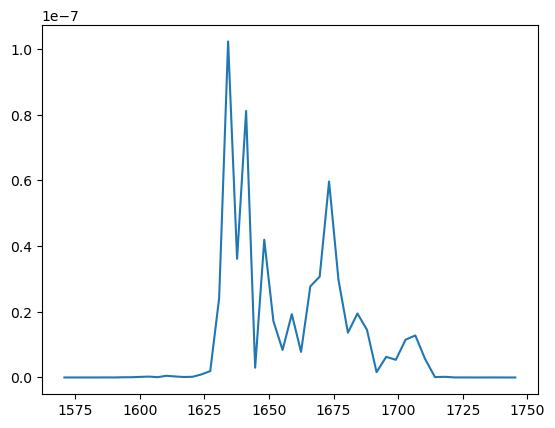

In [ ]:
x = 2*np.pi/np.array(pc2.w_values)
y = np.array(pc2.prob_w)
plt.plot(x,y)